# TP N° 2
## Obteniendo un posible CUIT a partir de una fecha de nacimiento y género

### Librerias necesarias

In [191]:
%matplotlib inline

# Libreria para tratar con Arrays y otro tipos de datos utilizados
import numpy as np

# Libreria para graficar
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Libreria que probee herramientas para el manejo de datos
import pandas as pd

# Libreria que incluye redes neuronales, en nuestro caso un MLP (Multi Layer Preceptron)
from sklearn.neural_network import MLPRegressor

# Libreria de hora y fecha
from time import time
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Librerias para realizar preprocesado de datos (Transformaciones y estandarizacion)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

plt.style.use('seaborn-poster')

### Cargando el archivo CSV en memoria

In [192]:
# Cargamos el CSV en memoria
cuiles = pd.read_csv('cuiles2.csv', names = ["CUIL", "Nacimiento", "Sexo"])

# Definimos los datasets de entrenamiento y prueba
train = cuiles.sample(frac=0.75)
test = cuiles.drop(train.index)

print(train)
print('\n-------------------------------------------\n')
print(test)

            CUIL  Nacimiento Sexo
79   20202755977  02-04-1969    M
94   20286985913  01-01-1970    M
398  27144337021  19-10-1960    F
322  20165840462  11-02-1963    M
783  27336138545  10-03-1988    F
604  20268870793  13-10-1978    M
995  27126398331  16-09-1956    F
285  23251849714  01-01-1970    F
814  27288336356  01-09-1981    F
947  27259149083  13-05-1977    F
958  23132632154  21-03-1959    F
788  27174320727  11-01-1965    F
203  27066579439  23-12-1947    F
335  27926707642  13-07-1958    F
929  20149010611  12-01-1962    M
111  27926242666  19-05-1957    F
63   20165062532  02-05-1963    M
270  20178738594  09-02-1966    M
786  27294002702  13-03-1982    F
910  27176180264  13-10-1963    F
137  27133146917  25-05-1959    F
663  23211552484  26-10-1969    F
690  27326863217  22-02-1987    F
344  27125145006  18-07-1958    F
883  23272834644  15-09-1979    F
381  20238439532  31-05-1974    M
105  23174542384  21-05-1965    F
369  27294973708  04-06-1982    F
313  272350923

### Creando la instancia de regresor utilizando un MLP (Multi Layer Perceptron)

#### Multi Layer Perceptron (Perceptrón Multicapa)
Utilizamos un tipo de red neuronal llamado Perceptrón Multicapa, el mismo consta de 4 capas, compuestas por 200 perceptrones para la entrada, 400 y 400 en sus capas ocultas, y 200 en sus capas de salida.
Utilizamos el algoritmo adam (https://arxiv.org/abs/1412.6980) a que provee una excelente respuesta para datasets con mas de 100 registros; cuya funcion de activación es la de rectificador (ReLU), es decir sus valores van desde 0 a f(x) = max(x) es decir, el valor maximo del dataset de entrada.
Esto es particularmente útil dado que probando otro tipo de funciones, como la tangente hiperbolica, se obtinen resultados escalados y suponemos se requeriria una especie de postproceso para reconvertir la salida al dominio de la entrada. Con ReLU nos aseguramos conservar la escala.

In [193]:
# Creamos el objeto MLP con las opciones definidas en su constructor
mlp = MLPRegressor(hidden_layer_sizes=(200,400,400,200), max_iter = 2000, solver='adam', \
                   alpha=0.01, activation = 'relu', random_state = 9)

def nacimiento_a_dias(arr): 
    return [((datetime.now() - datetime.strptime(item, '%d-%m-%Y')).days) for item in arr]

# Features de entrenamiento
x_train = nacimiento_a_dias(train['Nacimiento'])
z_train = train['Sexo']

# Labels de entrenamiento
y_train = train['CUIL'].astype(float)

# Features de prueba
x_test = nacimiento_a_dias(test['Nacimiento'])
z_test = test['Sexo']

# Labels de prueba
y_test = test['CUIL'].astype(float)

# Convertimos la feature z a 1 y 0
le = preprocessing.LabelEncoder()
le.fit(z_train)
z_train = le.transform(z_train)
le = preprocessing.LabelEncoder()
le.fit(z_test)
z_test = le.transform(z_test)

#Creamos la matriz de features, es decir [[Cantidad de dias pasados , Sexo]]
X_train = np.column_stack((x_train, z_train))
X_test = np.column_stack((x_test, z_test))

print(X_train)
print('\n-------------------------------------------\n')
print(X_test)

[[17951     1]
 [17677     1]
 [21038     0]
 ...
 [13403     1]
 [16627     0]
 [17677     0]]

-------------------------------------------

[[14781     1]
 [18631     1]
 [17677     0]
 [12614     0]
 [13254     0]
 [20133     0]
 [16865     1]
 [22119     1]
 [16862     0]
 [18526     1]
 [18596     0]
 [18431     0]
 [17716     0]
 [16518     0]
 [15380     0]
 [20781     0]
 [16435     0]
 [16222     0]
 [13254     0]
 [11944     0]
 [14779     0]
 [20643     1]
 [17530     0]
 [21798     1]
 [16298     1]
 [14627     0]
 [20429     0]
 [16835     0]
 [13531     0]
 [20876     1]
 [14688     0]
 [20135     0]
 [14059     0]
 [ 9727     0]
 [23571     0]
 [13040     0]
 [20686     0]
 [15363     1]
 [20657     0]
 [12825     0]
 [22115     1]
 [13843     1]
 [17677     0]
 [12462     1]
 [14012     1]
 [12557     0]
 [19932     0]
 [20355     0]
 [14693     1]
 [19091     0]
 [21351     0]
 [17425     1]
 [14091     0]
 [19999     0]
 [ 8882     0]
 [19962     1]
 [14508     0]
 [1

#### Tratamiento a los datos de entrada
Los datos de entrada constan de una matriz de 2xN formada por [Cantidad de dias, Sexo], utilizamos
cantidad de días dado que debemos darle una entrada representativa a la red neuronal, que pueda aprender.
No podemos usar un dato tipo cadena de texto dado que no guardaria una relacion con el dominio del problema.

La columna Sexo, tambien es estandarizada a 0 y 1, siendo 0 Femenino y 1 Hombre.

#### Probando la red neuronal

In [194]:
# MLP resultó tras muchísimas pruebas ser muy sensible a las diferentes escalas y rangos de datos
# Por eso realizamos un escalamiento de -1 a 1 en la matriz de entrada
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
scaler.fit(X_test)  
X_test = scaler.transform(X_test)

#y = y.tolist()
#scaler = StandardScaler()  
#scaler.fit(y)  
#y = scaler.transform(y)

t0 = time()
mlp = mlp.fit(X_train, y_train)
pred = mlp.predict(X_train)

print(f"Tiempo de entrenamiento: {round(time()-t0, 3)}s")

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Tiempo de entrenamiento: 114.529s


#### Resultados
Verificamos la exactitud de la predicción.

ValueError: x and y must have same first dimension, but have shapes (250, 2) and (750,)

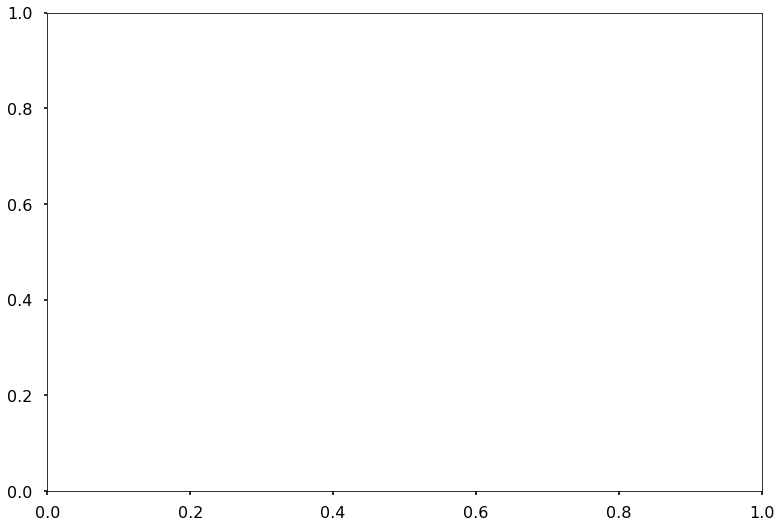

In [199]:
plt.plot(X_test, pred)

Obtenemos el score del algoritmo.

In [198]:
print(f"Score del MLP: {mlp.score(X_test, y_test)}")

Score del MLP: 0.8301376582376154
